# Get the Rating Matrix

In [24]:
import pickle 

pickle_in = open("../datasets/rating_matrix.pickle","rb")
rating_matrix = pickle.load(pickle_in) 
pickle_in.close() 

In [25]:
type(rating_matrix)

dict

In [26]:
# !pip install apyori

In [27]:
# !pip install mlxtend  

In [28]:
# !pip install efficient-apriori

In [29]:
import pandas as pd 

data = pd.Series(rating_matrix).reset_index() 
data.columns = ["option_x", "option_y", "rating"] 

data.head() 

,option_x,option_y,rating
0,745321,666652,1
1,745321,751782,1
2,745321,751839,10
3,666652,751782,1
4,666652,751839,1


In [30]:
data_with_3 = pd.read_csv("../datasets/ratings_with_3_combinations.csv")[["rating", "bill"]]

data_with_3.head()

,rating,bill
0,1,"(745321, 666652)"
1,1,"(745321, 751782)"
2,10,"(745321, 751839)"
3,1,"(666652, 751782)"
4,1,"(666652, 751839)"


In [31]:
data_3_greater_1 = data_with_3[data_with_3.rating > 1] 

data_3_greater_1.head() 

,rating,bill
2,10,"(745321, 751839)"
5,151,"(751782, 751839)"
10,107,"(751873, 760125)"
11,12,"(772494, 754574)"
13,11,"(772494, 749358)"


In [32]:
len(data_with_3), len(data)

(5216080, 771062)

In [33]:
data.describe()

,option_x,option_y,rating
count,771062.000000,771062.000000,771062.000000
mean,735325.372226,735395.857417,2.418680
std,42364.768430,42085.392109,9.794105
min,16329.000000,10494.000000,1.000000
25%,714744.000000,714645.000000,1.000000
50%,751526.000000,751358.000000,1.000000
75%,760344.000000,760209.000000,2.000000
max,823758.000000,823758.000000,2254.000000


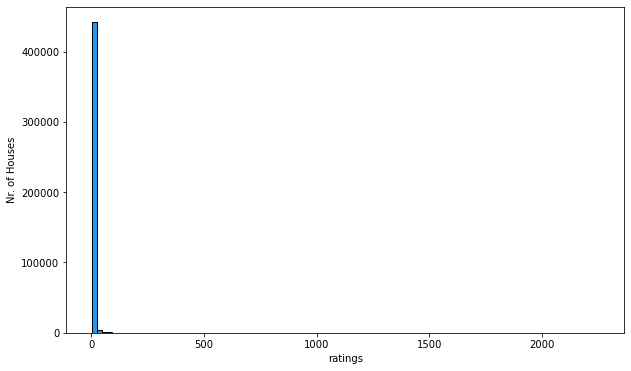

In [34]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

In [35]:
max(data_3_greater_1.rating),  min(data_3_greater_1.rating)

(2254, 2)

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\melih.kacaman\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

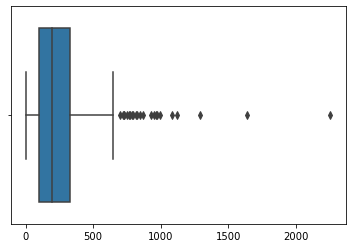

In [36]:
import seaborn as sns
sns.boxplot(data_3_greater_1['rating'].unique())

In [37]:
import numpy as np
data_3_greater_1_log = data_3_greater_1.copy() 
data_3_greater_1_log["rating"] = np.log(data_3_greater_1.rating) 

data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [38]:
max(data_3_greater_1_log.rating),  min(data_3_greater_1_log.rating)

(7.720461694599722, 0.6931471805599453)

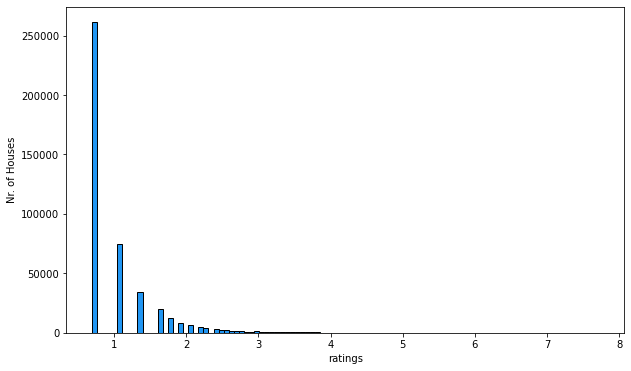

In [39]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(data_3_greater_1_log['rating'], bins=100, ec='black', color='#2196f3')
plt.xlabel('ratings')
plt.ylabel('Nr. of Houses')
plt.show()

c:\Users\melih.kacaman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

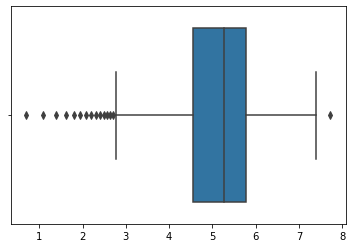

In [40]:
import seaborn as sns
sns.boxplot(data_3_greater_1_log['rating'].unique())

In [41]:
import numpy as np 
Q1 = np.percentile(data_3_greater_1_log['rating'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data_3_greater_1_log['rating'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("data_3_greater_1_log has IQR:", IQR) 

data_3_greater_1_log has IQR: 0.6931471805599453


In [42]:
import pandas as pd
data_raw = pd.read_csv("../datasets/raw_data.csv") 

In [43]:
data_raw.head() 

,Unnamed: 0,optionId,bill
0,0,751839,1
1,1,751782,1
2,2,745321,1
3,3,666652,1
4,4,751873,2


In [44]:
data_raw

,Unnamed: 0,optionId,bill
0,0,751839,1
1,1,751782,1
2,2,745321,1
3,3,666652,1
4,4,751873,2
...,...,...,...
1023028,1023028,764458,326055
1023029,1023029,764905,326056
1023030,1023030,774483,326056
1023031,1023031,752244,326057


In [45]:
transactions = [] 

bill = 1
option_bill = [] 

for index,row in data_raw.iterrows(): 
    if(row.bill == bill):
        option_bill.append(row.optionId)
    else:
        bill = row.bill 
        transactions.append(tuple(set(option_bill))) 
        option_bill.clear()
        option_bill.append(row.optionId)  


transactions[:3]

[(745321, 666652, 751782, 751839),
 (751873, 760125),
 (772494, 754574, 745328, 749358, 745310)]

# Model 1: Matrix Factorization Using Keras 

#### Data Prep for MF 

In [46]:
data_3_greater_1_log.head() 

,rating,bill
2,2.302585,"(745321, 751839)"
5,5.017280,"(751782, 751839)"
10,4.672829,"(751873, 760125)"
11,2.484907,"(772494, 754574)"
13,2.397895,"(772494, 749358)"


In [47]:
data_3_greater_1_log.bill.unique().shape

(448529,)

In [48]:
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [49]:
from ast import literal_eval

data_3_greater_1_log.bill = data_3_greater_1_log.bill.apply(literal_eval) 
data_3_greater_1_log.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448529 entries, 2 to 5215140
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rating  448529 non-null  float64
 1   bill    448529 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.3+ MB


In [50]:
type(data_3_greater_1_log.bill.iat[0])

tuple

In [51]:
statement = (772494, 754574, 749358) 
s_set = set(statement) 
tuple(s_set.difference([772494]))

(749358, 754574)

In [52]:
def split_bill(statement):
    return [
        (tuple(set(statement).difference([statement[0]])), statement[0]),
        (tuple(set(statement).difference([statement[1]])), statement[1]),
        (tuple(set(statement).difference([statement[2]])), statement[2])
    ]

In [53]:
data_3_greater_1_log["option_count"] = data_3_greater_1_log.bill.apply(lambda x: len(x))
data_3_greater_1_log.tail() 

,rating,bill,option_count
5211482,0.693147,"(774694, 767718, 767721)",3
5213307,0.693147,"(774590, 774319)",2
5213311,0.693147,"(774469, 774590, 774319)",3
5213576,0.693147,"(764896, 786771, 774571)",3
5215140,0.693147,"(748899, 748868, 752949)",3


In [54]:
sublist_by_2 = data_3_greater_1_log[data_3_greater_1_log.option_count == 2]

In [55]:
sublist_by_2_concat = pd.concat([
    sublist_by_2,
    pd.DataFrame(data_3_greater_1_log[data_3_greater_1_log.option_count == 2].bill.to_list(), columns=["LHS", "RHS"], index=sublist_by_2.index)
], axis=1)
sublist_by_2_concat.head()

,rating,bill,option_count,LHS,RHS
2,2.302585,"(745321, 751839)",2,745321,751839
5,5.017280,"(751782, 751839)",2,751782,751839
10,4.672829,"(751873, 760125)",2,751873,760125
11,2.484907,"(772494, 754574)",2,772494,754574
13,2.397895,"(772494, 749358)",2,772494,749358


In [56]:
sublist_by_3 = data_3_greater_1_log[data_3_greater_1_log.option_count == 3]
sublist_by_3.head() 

,rating,bill,option_count
22,0.693147,"(772494, 754574, 749358)",3
28,0.693147,"(754574, 745328, 745310)",3
44,1.098612,"(751649, 751591, 751532)",3
45,0.693147,"(751649, 751591, 751597)",3
46,0.693147,"(751649, 751595, 751532)",3


In [57]:
replicated_rows = pd.DataFrame(np.repeat(sublist_by_3.values, 3, axis=0), columns=sublist_by_3.columns)

sublists_by_3_reduced = []  
for item in sublist_by_3.bill.to_list():
    sublists_by_3_reduced += split_bill(item) 

sublists_by_3_reduced = pd.DataFrame(sublists_by_3_reduced, columns=["LHS", "RHS"])

sublist_by_3_concat = pd.concat([
    replicated_rows, 
    sublists_by_3_reduced
], axis=1)

sublist_by_3_concat.head() 

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [58]:
dataset_combined_MF = pd.concat([sublist_by_3_concat, sublist_by_2_concat], axis=0, ignore_index=True)
dataset_combined_MF.head()  

,rating,bill,option_count,LHS,RHS
0,0.693147,"(772494, 754574, 749358)",3,"(749358, 754574)",772494
1,0.693147,"(772494, 754574, 749358)",3,"(749358, 772494)",754574
2,0.693147,"(772494, 754574, 749358)",3,"(754574, 772494)",749358
3,0.693147,"(754574, 745328, 745310)",3,"(745328, 745310)",754574
4,0.693147,"(754574, 745328, 745310)",3,"(745310, 754574)",745328


In [59]:
dataset_combined_MF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859833 entries, 0 to 859832
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        859833 non-null  object
 1   bill          859833 non-null  object
 2   option_count  859833 non-null  object
 3   LHS           859833 non-null  object
 4   RHS           859833 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 32.8+ MB


In [60]:
sublist_by_2_concat["LHS_C"] = sublist_by_2_concat.LHS.astype('category').cat.codes.values
sublist_by_2_concat["RHS_C"] = sublist_by_2_concat.RHS.astype('category').cat.codes.values

sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


### Building MF Model 

In [64]:
from tensorflow import keras
from keras.optimizers import Adam 

n_rhs, n_lhs = len(sublist_by_2_concat.RHS_C.unique()), len(sublist_by_2_concat.LHS_C.unique())
n_latent_factors = 20
# input, embedding --> 
lhs_input = keras.layers.Input(shape=(1,), name="lhs-item") 
lhs_embedding = keras.layers.Embedding(n_lhs + 1, n_latent_factors, name="lhs-embeddings")(lhs_input) 
lhs_vec = keras.layers.Flatten(name="flatten-lhs")(lhs_embedding) 

rhs_input= keras.layers.Input(shape=(1,), name="rhs-item")
rhs_embedding = keras.layers.Embedding(n_rhs + 1, n_latent_factors, name="rhs-embeddings")(rhs_input) 
rhs_vec = keras.layers.Flatten(name="flatten-rhs")(rhs_embedding)

product = keras.layers.dot([lhs_vec, rhs_vec], axes=1, name="dot-product") 

model = keras.Model([lhs_input, rhs_input], product) 


In [66]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 rhs-item (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 lhs-embeddings (Embedding)     (None, 1, 20)        100860      ['lhs-item[0][0]']               
                                                                                                  
 rhs-embeddings (Embedding)     (None, 1, 20)        101820      ['rhs-item[0][0]']               
                                                                                            

In [67]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(sublist_by_2_concat[["RHS_C", "LHS_C"]], sublist_by_2_concat.rating, test_size=0.20) 
X_train[:5], y_train[:5]

(         RHS_C  LHS_C
 1512525   2765   3493
 291304    3426   3342
 264476    3892     71
 1345907   1814   2590
 2675859   4744   1376,
 1512525    0.693147
 291304     1.609438
 264476     0.693147
 1345907    1.098612
 2675859    1.609438
 Name: rating, dtype: float64)

In [73]:
history = model.fit(
    [X_train.LHS_C, X_train.RHS_C], 
    y_train,
    epochs=2
)

Epoch 1/2
6072/6072 [==============================] - 21s 3ms/step - loss: 0.1762 - mae: 0.3062 - mse: 0.1762
Epoch 2/2
6072/6072 [==============================] - 20s 3ms/step - loss: 0.1660 - mae: 0.2976 - mse: 0.1660


In [81]:
X_train

,RHS_C,LHS_C
1512525,2765,3493
291304,3426,3342
264476,3892,71
1345907,1814,2590
2675859,4744,1376
...,...,...
2005727,607,1757
29270,2345,2297
2324159,3363,3198
10586,1130,3166


In [82]:
X_train[X_train.RHS_C == 2765]

,RHS_C,LHS_C
1512525,2765,3493
2641406,2765,3248
775689,2765,1476
293129,2765,3100
334859,2765,2755
...,...,...
293243,2765,3095
1436912,2765,3094
3580010,2765,3077
1525768,2765,2740


In [83]:
X_train[X_train.LHS_C == 2765]

,RHS_C,LHS_C
1169775,2794,2765
33899,2807,2765


In [87]:
sublist_by_2_concat[sublist_by_2_concat.LHS == 745321]

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
616,5.351858,"(745321, 745310)",2,745321,745310,2524,2544
1132,5.752573,"(745321, 745332)",2,745321,745332,2524,2559
4938,0.693147,"(745321, 760148)",2,745321,760148,2524,3747
4939,1.609438,"(745321, 753628)",2,745321,753628,2524,3392
...,...,...,...,...,...,...,...
3234416,0.693147,"(745321, 789162)",2,745321,789162,2524,4965
3400541,0.693147,"(745321, 666427)",2,745321,666427,2524,553
3420337,0.693147,"(745321, 611987)",2,745321,611987,2524,73
3437979,0.693147,"(745321, 713973)",2,745321,713973,2524,1736


In [88]:
sublist_by_2_concat[sublist_by_2_concat.RHS == 745321]

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
4930,2.995732,"(759397, 745321)",2,759397,745321,3678,2551
4934,2.564949,"(745340, 745321)",2,745340,745321,2535,2551
5717,4.077537,"(745312, 745321)",2,745312,745321,2518,2551
7905,2.564949,"(666624, 745321)",2,666624,745321,555,2551
8984,2.484907,"(753280, 745321)",2,753280,745321,3163,2551
...,...,...,...,...,...,...,...
2756443,0.693147,"(715170, 745321)",2,715170,745321,1893,2551
3020043,0.693147,"(745444, 745321)",2,745444,745321,2561,2551
3234413,1.098612,"(789153, 745321)",2,789153,745321,4921,2551
3234414,1.098612,"(789122, 745321)",2,789122,745321,4918,2551


In [68]:
sublist_by_2_concat.rating.max(), sublist_by_2_concat.rating.min() 

(7.720461694599722, 0.6931471805599453)

In [258]:
model.get_layer(name='lhs-embeddings').get_weights()

[array([[-0.20942211,  0.17964152, -0.22562473, ..., -0.23400342,
         -0.18543516, -0.25125247],
        [ 0.02841862,  0.13459192,  0.03790177, ...,  0.20002832,
         -0.14327979, -0.03282325],
        [-0.41530976,  0.4203659 , -0.31914645, ..., -0.07864063,
          0.41820493, -0.15772763],
        ...,
        [-0.1282023 ,  0.14917485,  0.12013394, ...,  0.00111962,
         -0.25943008, -0.3746646 ],
        [-0.12571386, -0.16260399,  0.5803891 , ..., -0.656824  ,
          0.28580412,  0.01063784],
        [ 0.03707497,  0.02086094, -0.0494905 , ...,  0.02872101,
         -0.0133733 , -0.02868872]], dtype=float32)]

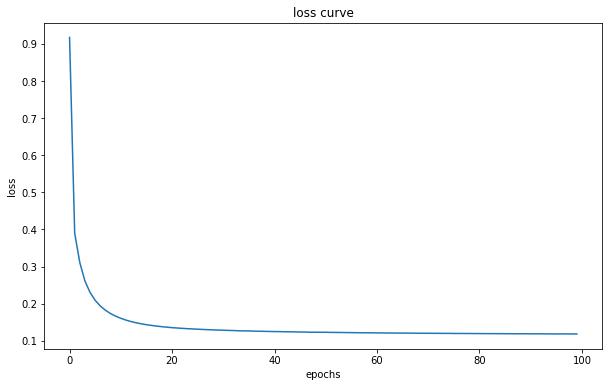

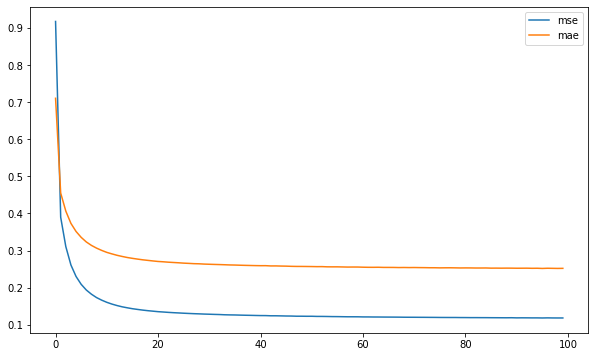

In [260]:
import matplotlib.pyplot as plt 

plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
pd.DataFrame(history.history)["loss"].plot(figsize=(10,6)) 
pd.DataFrame(history.history)[["mse", "mae"]].plot(figsize=(10,6))
plt.show() 

In [261]:
lhs_embddings = model.get_layer(name='lhs-embeddings').get_weights()[0]
lhs_embddings

array([[-0.20942211,  0.17964152, -0.22562473, ..., -0.23400342,
        -0.18543516, -0.25125247],
       [ 0.02841862,  0.13459192,  0.03790177, ...,  0.20002832,
        -0.14327979, -0.03282325],
       [-0.41530976,  0.4203659 , -0.31914645, ..., -0.07864063,
         0.41820493, -0.15772763],
       ...,
       [-0.1282023 ,  0.14917485,  0.12013394, ...,  0.00111962,
        -0.25943008, -0.3746646 ],
       [-0.12571386, -0.16260399,  0.5803891 , ..., -0.656824  ,
         0.28580412,  0.01063784],
       [ 0.03707497,  0.02086094, -0.0494905 , ...,  0.02872101,
        -0.0133733 , -0.02868872]], dtype=float32)

In [262]:
rhs_embddings = model.get_layer(name='rhs-embeddings').get_weights()[0]
rhs_embddings

array([[ 0.19675   ,  0.1866735 , -0.2003656 , ...,  0.14735422,
        -0.24856205, -0.20726104],
       [-0.0379989 ,  0.26103553,  0.02723127, ..., -0.0310324 ,
        -0.33878103,  0.03931811],
       [-0.20876454,  0.18137963, -0.21787699, ..., -0.22313525,
        -0.18592082, -0.25180265],
       ...,
       [-0.32148919, -0.20469247,  0.22150776, ..., -0.28182837,
         0.05838595,  0.20057122],
       [-0.14905392, -0.15806538,  0.31706807, ...,  0.04027366,
         0.620842  ,  0.46800125],
       [ 0.02805981, -0.0466851 , -0.00787505, ...,  0.03328708,
        -0.0140192 , -0.04915602]], dtype=float32)

In [263]:
def recommend(option_in_category, number_of_movies=5):
  options = lhs_embddings[option_in_category]@rhs_embddings.T
  mids = np.argpartition(options, -number_of_movies)[-number_of_movies:]
  
  return mids

In [264]:
recommend(2524)

array([2544, 5011, 4248, 2540, 2559], dtype=int64)

In [265]:
sublist_by_2_concat.head() 

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
2,2.302585,"(745321, 751839)",2,745321,751839,2524,3071
5,5.017280,"(751782, 751839)",2,751782,751839,3019,3071
10,4.672829,"(751873, 760125)",2,751873,760125,3039,3746
11,2.484907,"(772494, 754574)",2,772494,754574,4308,3518
13,2.397895,"(772494, 749358)",2,772494,749358,4308,2816


In [266]:
sublist_by_2_concat[sublist_by_2_concat.RHS_C == 2100].head()     # RHS = 721495, LHS = 751839

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C
776970,0.693147,"(760352, 721495)",2,760352,721495,3719,2100
776972,0.693147,"(760065, 721495)",2,760065,721495,3698,2100
776973,1.791759,"(767779, 721495)",2,767779,721495,4142,2100
776974,0.693147,"(760332, 721495)",2,760332,721495,3715,2100
1168575,2.079442,"(714275, 721495)",2,714275,721495,1741,2100


In [267]:
# RHS = 721495, LHS = 751839 
sublist_by_2_concat.loc[(sublist_by_2_concat.RHS== 721495) & (sublist_by_2_concat.LHS == 751839)]

,rating,bill,option_count,LHS,RHS,LHS_C,RHS_C


# Model 2: Apriori (apyori Module)

In [2]:
from apyori import apriori 

In [9]:
associations = apriori(
    transactions,
    min_length = 2,
    max_length=4,
    min_support = 0.0001,
    min_confidence = 0.0001,
    min_lift = 0.0001,
)

associations = list(associations)
len(associations)

8374

In [10]:
association = associations[100]
print(association)
print("support", association.support)
print(association.ordered_statistics)
print("right", association.ordered_statistics[0].items_add)
print("left", association.ordered_statistics[0].items_base)
print("confidence", association.ordered_statistics[0].confidence)
print("lift", association.ordered_statistics[0].lift)


RelationRecord(items=frozenset({635458}), support=0.0007728733714453959, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({635458}), confidence=0.0007728733714453959, lift=1.0)])
support 0.0007728733714453959
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({635458}), confidence=0.0007728733714453959, lift=1.0)]
right frozenset({635458})
left frozenset()
confidence 0.0007728733714453959
lift 1.0


In [11]:
rules = [] 
for association in associations:
    if len(association.ordered_statistics) > 1: 
        rules.append(association)

In [12]:
len(rules)

5228

In [13]:
rules 

[RelationRecord(items=frozenset({525099, 525100}), support=0.0011010378585273694, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({525099, 525100}), confidence=0.0011010378585273694, lift=1.0), OrderedStatistic(items_base=frozenset({525099}), items_add=frozenset({525100}), confidence=0.24224021592442646, lift=11.800967554677243), OrderedStatistic(items_base=frozenset({525100}), items_add=frozenset({525099}), confidence=0.05363812938891378, lift=11.800967554677243)]),
 RelationRecord(items=frozenset({525099, 701998}), support=0.00010734352381186054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({525099, 701998}), confidence=0.00010734352381186054, lift=1.0), OrderedStatistic(items_base=frozenset({525099}), items_add=frozenset({701998}), confidence=0.023616734143049933, lift=4.914089258293739), OrderedStatistic(items_base=frozenset({701998}), items_add=frozenset({525099}), confidence=0.022335673261008295, lift=4.91408925